In [1]:
%pip install matplotlib seaborn plotly plotnine

Note: you may need to restart the kernel to use updated packages.


In [2]:

# %matplotlib widget
import matplotlib.pyplot as plt
from polygonal_roadmaps import cli, environment
import networkx as nx
import numpy as np
import logging
import pandas as pd
import seaborn as sns
from IPython.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import tempfile

logging.getLogger().setLevel(logging.INFO)

%load_ext snakeviz

In [3]:
scenarios = ["MAPF;room-32-32-4;even", "MAPF;empty-8-8.map;even", "DrivingSwarm;icra2021_map.yaml;icra2021.yml"]
env = cli.env_generator(scenarios[-1], n_agents=2)[0]
env


/home/basti/Software/polygonal_roadmaps/polygonal_roadmaps/geometry.py:387: ShapelyDeprecationWarning: The 'GeometryType()' method is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if poly.geometryType() == 'MultiPolygon':
/home/basti/Software/polygonal_roadmaps/.venv/lib/python3.10/site-packages/shapely/linear.py:174: RuntimeWarning: invalid value encountered in shared_paths
  return lib.shared_paths(a, b, **kwargs)
/home/basti/Software/polygonal_roadmaps/polygonal_roadmaps/geometry.py:89: ShapelyDeprecationWarning: The 'GeometryType()' method is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if bp.geometryType() == 'MultiPolygon':
/home/basti/Software/polygonal_roadmaps/.venv/lib/python3.10/site-packages/shapely/linear.py:174: RuntimeWarning: invalid value encountered in shared_paths
  return lib.shared_paths(a, b, **kwargs)
/home/basti/Software/polygonal_roadmaps/polygonal_roadmaps/geom

In [4]:
planner = cli.create_planner_from_config_file("benchmark/planner_config/CCRv2.yml", env)
planner.create_plan()

[(26, 59, 5),
 (33, 34, 52),
 (59, 31, 74),
 (69, 25, 73),
 (70, None, 34),
 (74, None, None),
 (None, None, None)]

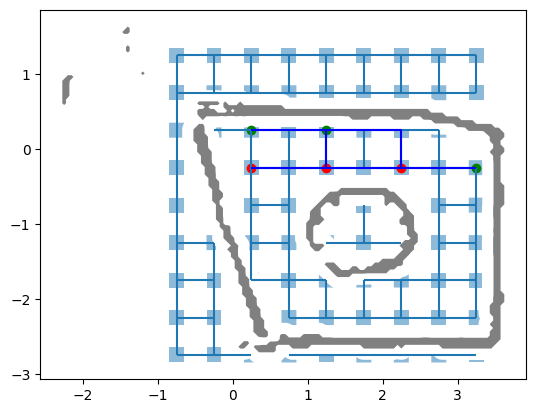

In [5]:
env.plot(paths=planner.history[0]["solution"])

In [6]:
from plotnine import *
from plotnine.animation import PlotnineAnimation

# for animation in the notebook
from matplotlib import rc
rc('animation', html='html5')

SCEN = 'even/maze-32-32-4-even-4.scen'
plt.close('all')

In [7]:
from polygonal_roadmaps import utils
plans = ['CCR.yml', 'CBS.yml', 'CBS_horizon_3.yml', 'PRIO.yml']
# plans = ['CCR.yml']
scens = ['maze_even.yml', 'maze_random.yml', 'room_32_even.yml', 'room_32_random.yml']
data = {}
profiles = []

d = utils.load_results(path="results")


ImportError: cannot import name 'utils' from 'polygonal_roadmaps' (/home/basti/Software/polygonal_roadmaps/polygonal_roadmaps/__init__.py)

In [ ]:
d[1].loc[d[1].social_reward.isna(), "social_reward"] = 0
d[1].loc[d[1].anti_social_punishment.isna(), "anti_social_punishment"] = 0
d[1].loc[d[1].horizon.isna(), "horizon"] = 0

NameError: name 'd' is not defined

In [ ]:
d[1].columns

NameError: name 'd' is not defined

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


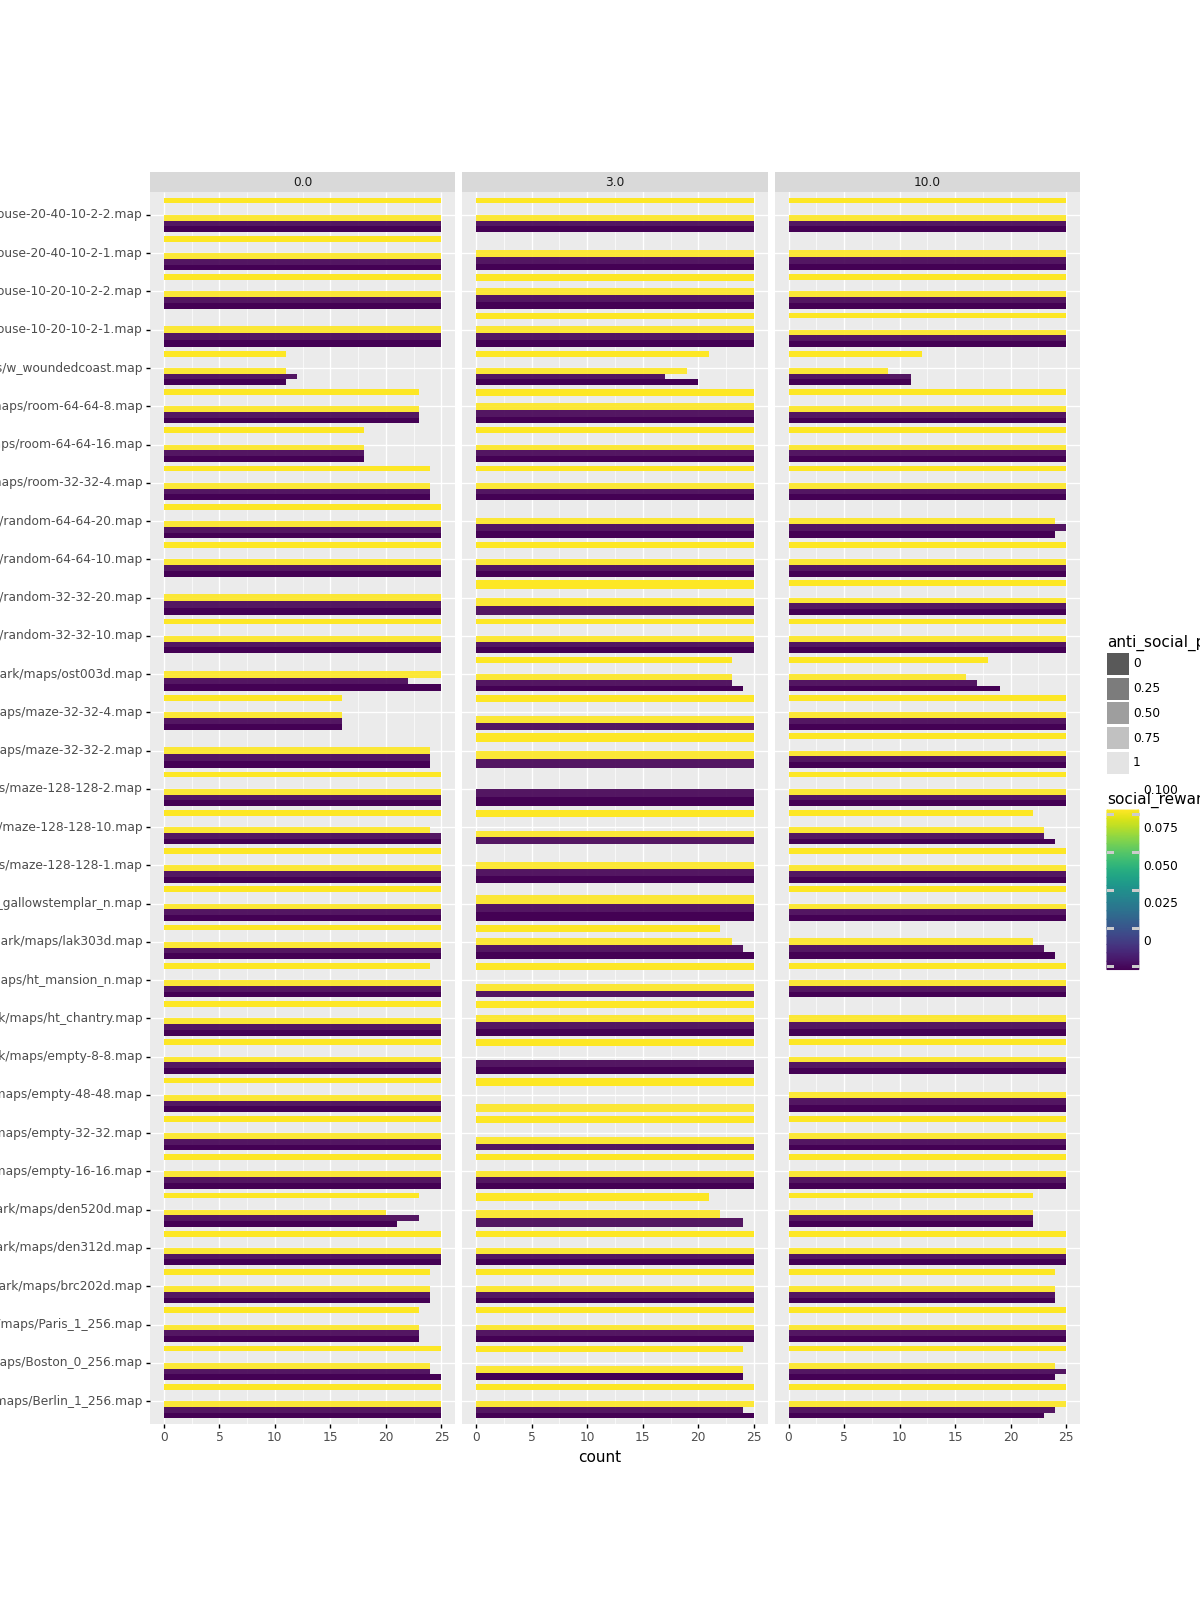

<ggplot: (717489872)>

In [ ]:
ggplot(d[1].loc[~d[1].failed & d[1].planner.eq('CCR')], aes(x="map_file", fill="social_reward", alpha="anti_social_punishment", groups="planner_file")) + geom_bar(position="dodge") + coord_flip() + scale_alpha((1, 0)) + theme(figure_size=(12,16)) + facet_wrap("horizon")

In [ ]:
len(d[1].map_file.unique())

32

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


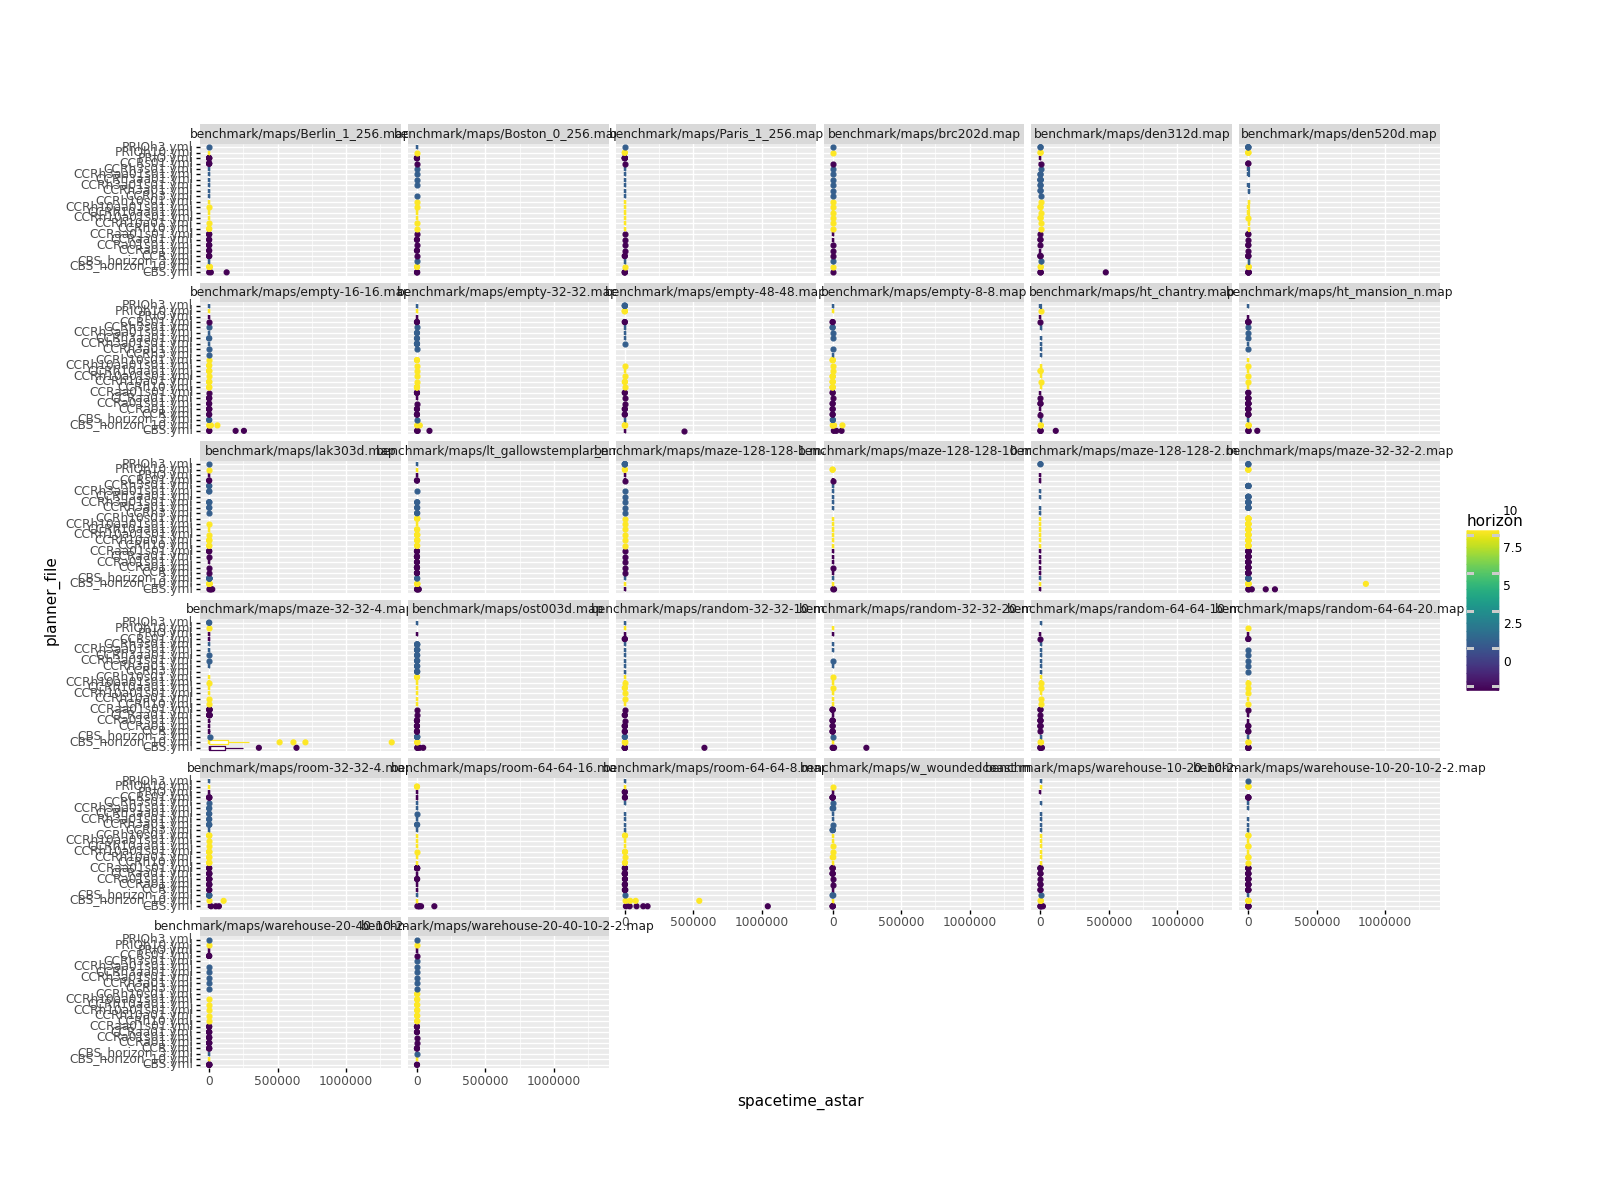

<ggplot: (718456197)>

In [ ]:
ggplot(d[1], aes(x='planner_file', y='spacetime_astar', color='horizon')) + geom_boxplot() + coord_flip() + facet_wrap('map_file') + theme(figure_size=(16, 12))

In [ ]:
d[1].map_file.unique()

array([PosixPath('benchmark/maps/maze-128-128-1.map'),
       PosixPath('benchmark/maps/den520d.map'),
       PosixPath('benchmark/maps/empty-32-32.map'),
       PosixPath('benchmark/maps/warehouse-20-40-10-2-2.map'),
       PosixPath('benchmark/maps/warehouse-20-40-10-2-1.map'),
       PosixPath('benchmark/maps/room-64-64-8.map'),
       PosixPath('benchmark/maps/lt_gallowstemplar_n.map'),
       PosixPath('benchmark/maps/room-64-64-16.map'),
       PosixPath('benchmark/maps/ht_chantry.map'),
       PosixPath('benchmark/maps/maze-32-32-4.map'),
       PosixPath('benchmark/maps/w_woundedcoast.map'),
       PosixPath('benchmark/maps/Boston_0_256.map'),
       PosixPath('benchmark/maps/random-64-64-10.map'),
       PosixPath('benchmark/maps/random-32-32-20.map'),
       PosixPath('benchmark/maps/den312d.map'),
       PosixPath('benchmark/maps/ht_mansion_n.map'),
       PosixPath('benchmark/maps/empty-8-8.map'),
       PosixPath('benchmark/maps/ost003d.map'),
       PosixPath('benchmark/m

In [ ]:
SCEN = 'room-32-32-4-even-6.scen'
run_data = d[0]['CCR.yml', 'even', SCEN]
prio_data = run_data.planner_step_history[0]['priorities']
x = []
for i, p in enumerate(prio_data):
    x.append({'x0' : p[0][0],
              'x1' : p[1][0],
              'y0' : p[0][1],
              'y1' : p[1][1],
              'i' : i})
df_prio = pd.DataFrame(x)
del x

env = polygonal_roadmap.MapfInfoEnvironment(f'even/{SCEN}', n_agents=10)
ex = polygonal_roadmap.Executor(env, None, None)
ex.history = run_data.history
df_history=ex.get_history_as_dataframe()
df_history.agent = df_history.agent.astype('category')
df_obstacles = env.get_obstacle_df()

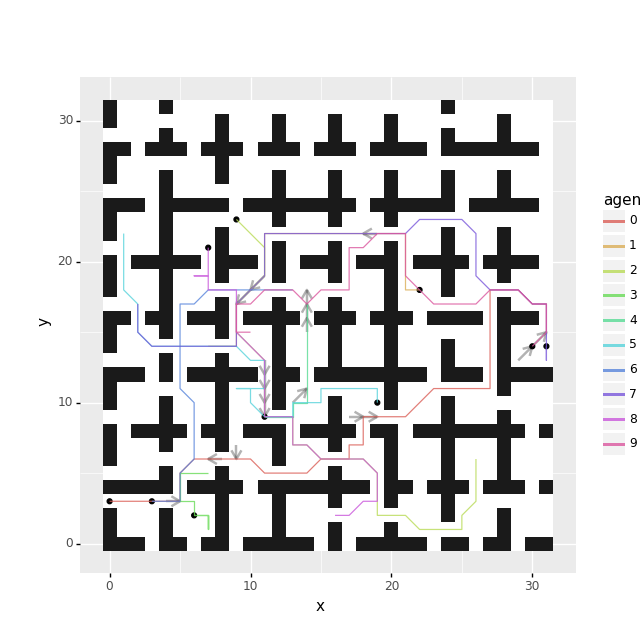

<ggplot: (778381258)>

In [ ]:
def plot_timestep(t, df, df_obstacles, prio_data):
    return ggplot(df_obstacles, aes(x="x", y="y")) + geom_tile(aes(fill="status")) + guides(fill=None) + scale_fill_gray(start=0.1, end=1)  + geom_segment(df_prio, aes(x="x0", y="y0", xend="x1", yend="y1"), alpha=0.3, size=1, arrow=arrow(length=0.1)) + geom_point(df.loc[df.t.eq(t)], aes(x="x", y="y")) + geom_path(df, aes(x="x", y="y", color="agent", group="agent"),alpha=0.8) + coord_fixed(ratio=1)
plot_timestep(0, df_history, df_obstacles, prio_data)#.save(f"{SCEN}.pdf")

In [ ]:
df = d[1]
df['|sta*|'] = df['spacetime_astar'] / df['makespan']
df['|a*|'] = df['spatial_astar'] / df['makespan']

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.


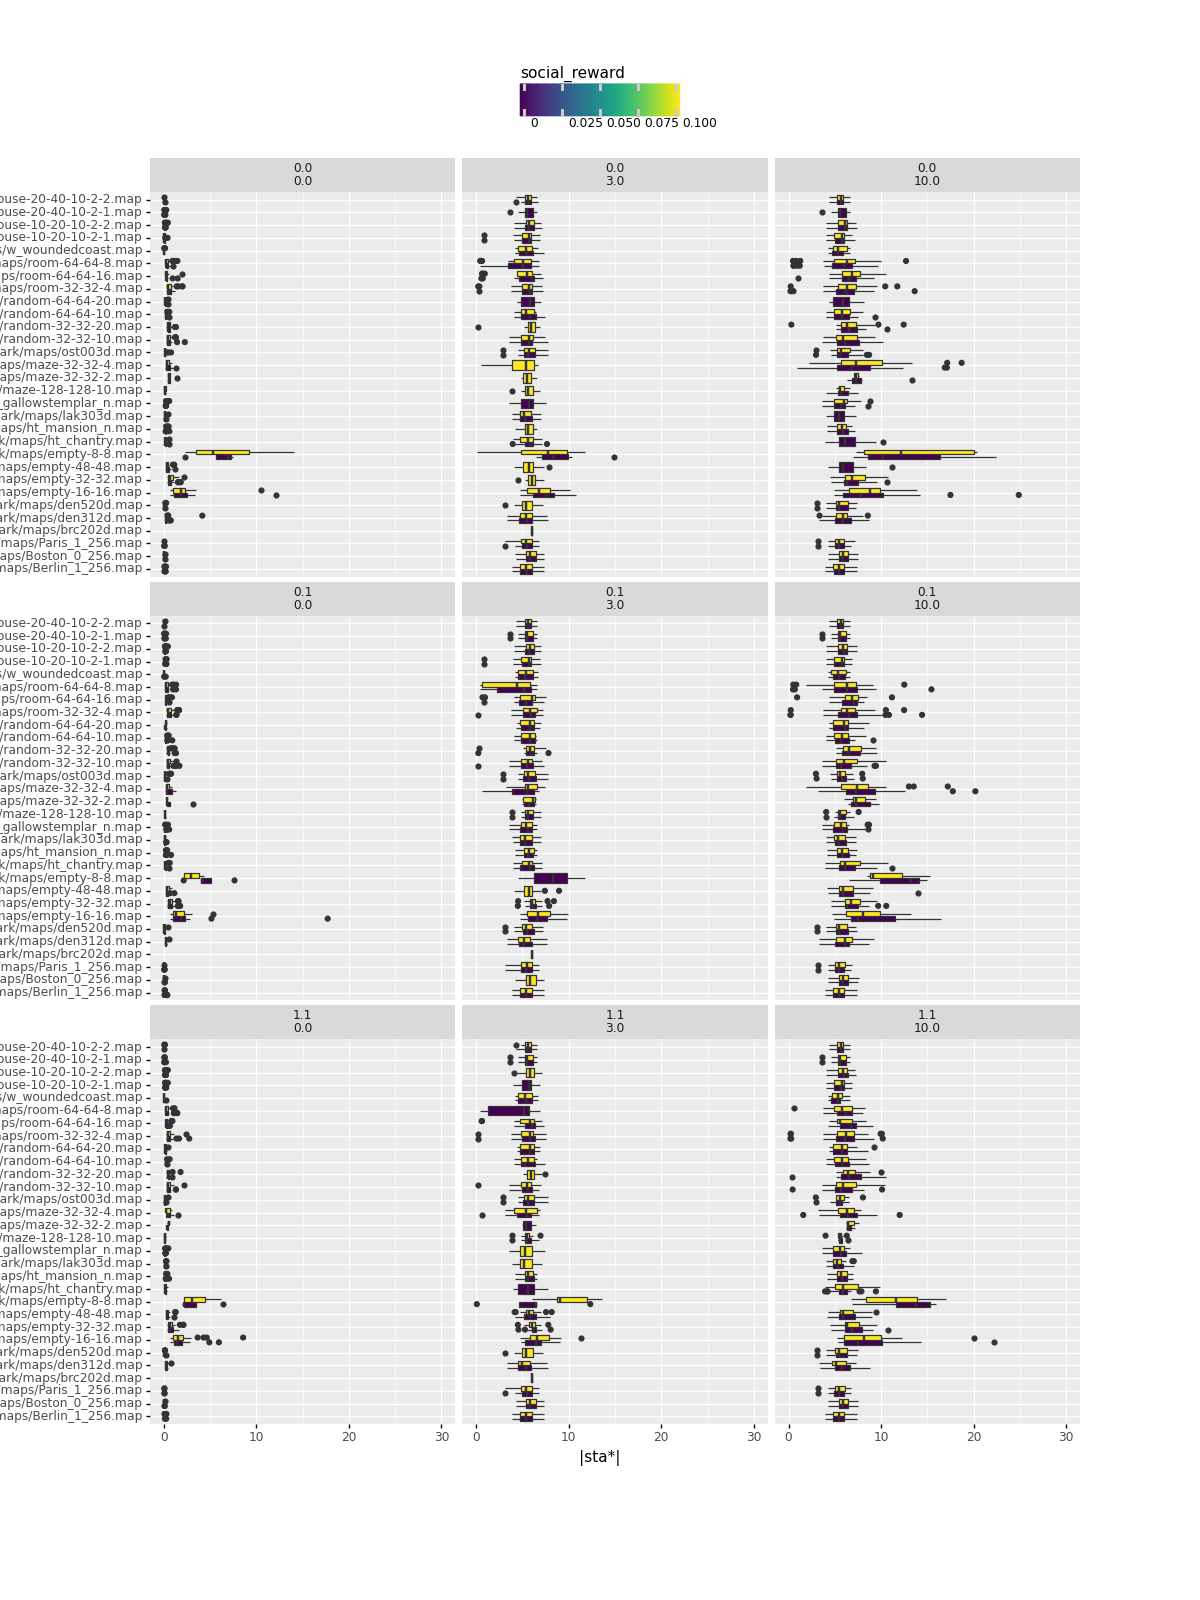

<ggplot: (722799098)>

In [ ]:
ggplot(df.loc[df.k.gt(0) & df.planner.eq('CCR')], aes(x="map_file", y="|sta*|", groups="planner_file", fill="social_reward")) + \
    geom_boxplot(position="dodge") + \
    ylim(0, 30) +\
    coord_flip() + \
    theme(figure_size=(12,16), legend_position="top") + \
    facet_wrap(["anti_social_punishment", "horizon"])

In [ ]:
def agg_func(df):
    data = {}
    data['sta*'] = df.loc[df.k > 0].spacetime_astar.mean()
    data['|sta*|'] = df.loc[df.k > 0, '|sta*|'].mean()

    data['a*'] = df.loc[df.k > 0].spatial_astar.mean()
    data['|a*|'] = df.loc[df.k > 0, '|a*|'].mean()
    
    data['makespan'] = df.loc[df.k > 0].makespan.mean()
    data['soc'] = df.loc[df.k > 0].sum_of_cost.mean()

    data['success rate'] = len(df.loc[df.k.gt(0)]) / 25
    # data['exceeded rate'] = len(df.loc[df.failed]) / 25
    return pd.DataFrame([data])

In [ ]:
df_maps = df.groupby(["planner", "horizon", "social_reward", "anti_social_punishment", "map_file"]).apply(agg_func).reset_index()

In [ ]:
t = df_maps.loc[df_maps.social_reward.eq(0) & df_maps.anti_social_punishment.eq(0)].groupby(["horizon", "planner"]).mean().loc[:, ["sta*", "|sta*|", "a*", "|a*|", "soc", "success rate"]]
s = t.to_latex(float_format="%.2f")
with open('ResultTable.tex', 'w') as resfile:
    resfile.write(s)
t

/var/folders/f5/7kx8kghx2_722736y_vzg_cm0000gn/T/ipykernel_80138/4181325753.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


sta*     |sta*|            a*        |a*|  \
horizon planner                                                                
0.0     CBS                 3369.528965  66.171722    593.091723    4.970197   
        CCR                   24.443626   0.518010    961.501413   15.870723   
        PrioritizedPlanner    10.000000   0.125419   8275.143223   41.155726   
3.0     CBS                 1143.294081   6.511818   2382.608421   12.995340   
        CCR                 1227.467967   5.748176   2307.154635   20.406435   
        PrioritizedPlanner   313.766169   4.860397  57080.954185  625.185981   
10.0    CBS                 4439.196969  61.089779   3962.436385   27.001548   
        CCR                 1044.196715   6.395987   3607.363461   33.131804   
        PrioritizedPlanner   399.866001   5.066387  79623.493821  764.692782   

                                    soc  success rate  
horizon planner                                        
0.0     CBS                 1101.880421      0.791250  
        CCR                 1108.670813      0.771250  
        PrioritizedPlanner  1253.216803      0.472000  
3.0     CBS                 1459.145265      0.852500  
        CCR                 1439.477821      0.755000  
        PrioritizedPlanner   335.387688      0.122963  
10.0    CBS                 1171.781757      0.808750  
        CCR                 1165.601846      0.765000  
        PrioritizedPlanner   427.171368      0.161429

In [ ]:
t = df_maps.loc[df_maps.planner.eq('CCR')].groupby(["horizon", "social_reward", "anti_social_punishment"]).mean().loc[:, ["sta*", "|sta*|", "a*", "|a*|", "soc"]]
s = t.to_latex(float_format="%.2f")
with open('ResultTable.tex', 'w') as resfile:
    resfile.write(s)
t

/var/folders/f5/7kx8kghx2_722736y_vzg_cm0000gn/T/ipykernel_80138/3138474053.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


sta*    |sta*|  \
horizon social_reward anti_social_punishment                          
0.0     0.0           0.0                       24.443626  0.518010   
                      0.1                       25.604063  0.485057   
                      1.1                       22.661201  0.391458   
        0.1           0.0                       25.692949  0.576044   
                      0.1                       21.889470  0.378470   
                      1.1                       22.234125  0.413646   
3.0     0.0           0.0                     1227.467967  5.748176   
                      0.1                     1096.150340  5.608694   
                      1.1                     1078.774780  5.578662   
        0.1           0.0                     1073.043950  5.556555   
                      0.1                     1120.917378  5.563803   
                      1.1                     1142.704203  5.767327   
10.0    0.0           0.0                     1044.196715  6.395987   
                      0.1                     1045.479658  6.717821   
                      1.1                     1015.573725  6.203744   
        0.1           0.0                     1049.017618  6.529994   
                      0.1                     1050.635310  7.165985   
                      1.1                     1002.416889  6.123258   

                                                       a*       |a*|  \
horizon social_reward anti_social_punishment                           
0.0     0.0           0.0                      961.501413  15.870723   
                      0.1                      990.888404  14.723868   
                      1.1                     1035.889324  12.927161   
        0.1           0.0                      978.162974  16.035283   
                      0.1                      931.416409  12.817458   
                      1.1                     1057.544404  14.305124   
3.0     0.0           0.0                     2307.154635  20.406435   
                      0.1                     2175.481998  18.026608   
                      1.1                     2217.333288  17.923015   
        0.1           0.0                     2149.618637  17.657568   
                      0.1                     2169.146157  14.990758   
                      1.1                     2233.738120  20.207621   
10.0    0.0           0.0                     3607.363461  33.131804   
                      0.1                     3655.521425  36.366370   
                      1.1                     3632.018036  33.216104   
        0.1           0.0                     3688.480132  36.484483   
                      0.1                     3716.608785  36.440976   
                      1.1                     3351.958416  31.674177   

                                                      soc  
horizon social_reward anti_social_punishment               
0.0     0.0           0.0                     1108.670813  
                      0.1                     1109.261376  
                      1.1                     1106.659512  
        0.1           0.0                     1155.491778  
                      0.1                     1106.445535  
                      1.1                     1104.952408  
3.0     0.0           0.0                     1439.477821  
                      0.1                     1292.686259  
                      1.1                     1282.726297  
        0.1           0.0                     1308.006034  
                      0.1                     1326.943869  
                      1.1                     1332.622565  
10.0    0.0           0.0                     1165.601846  
                      0.1                     1141.448524  
                      1.1                     1133.392188  
        0.1           0.0                     1162.751721  
                      0.1                     1147.978302  
                      1.1                     1119.

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


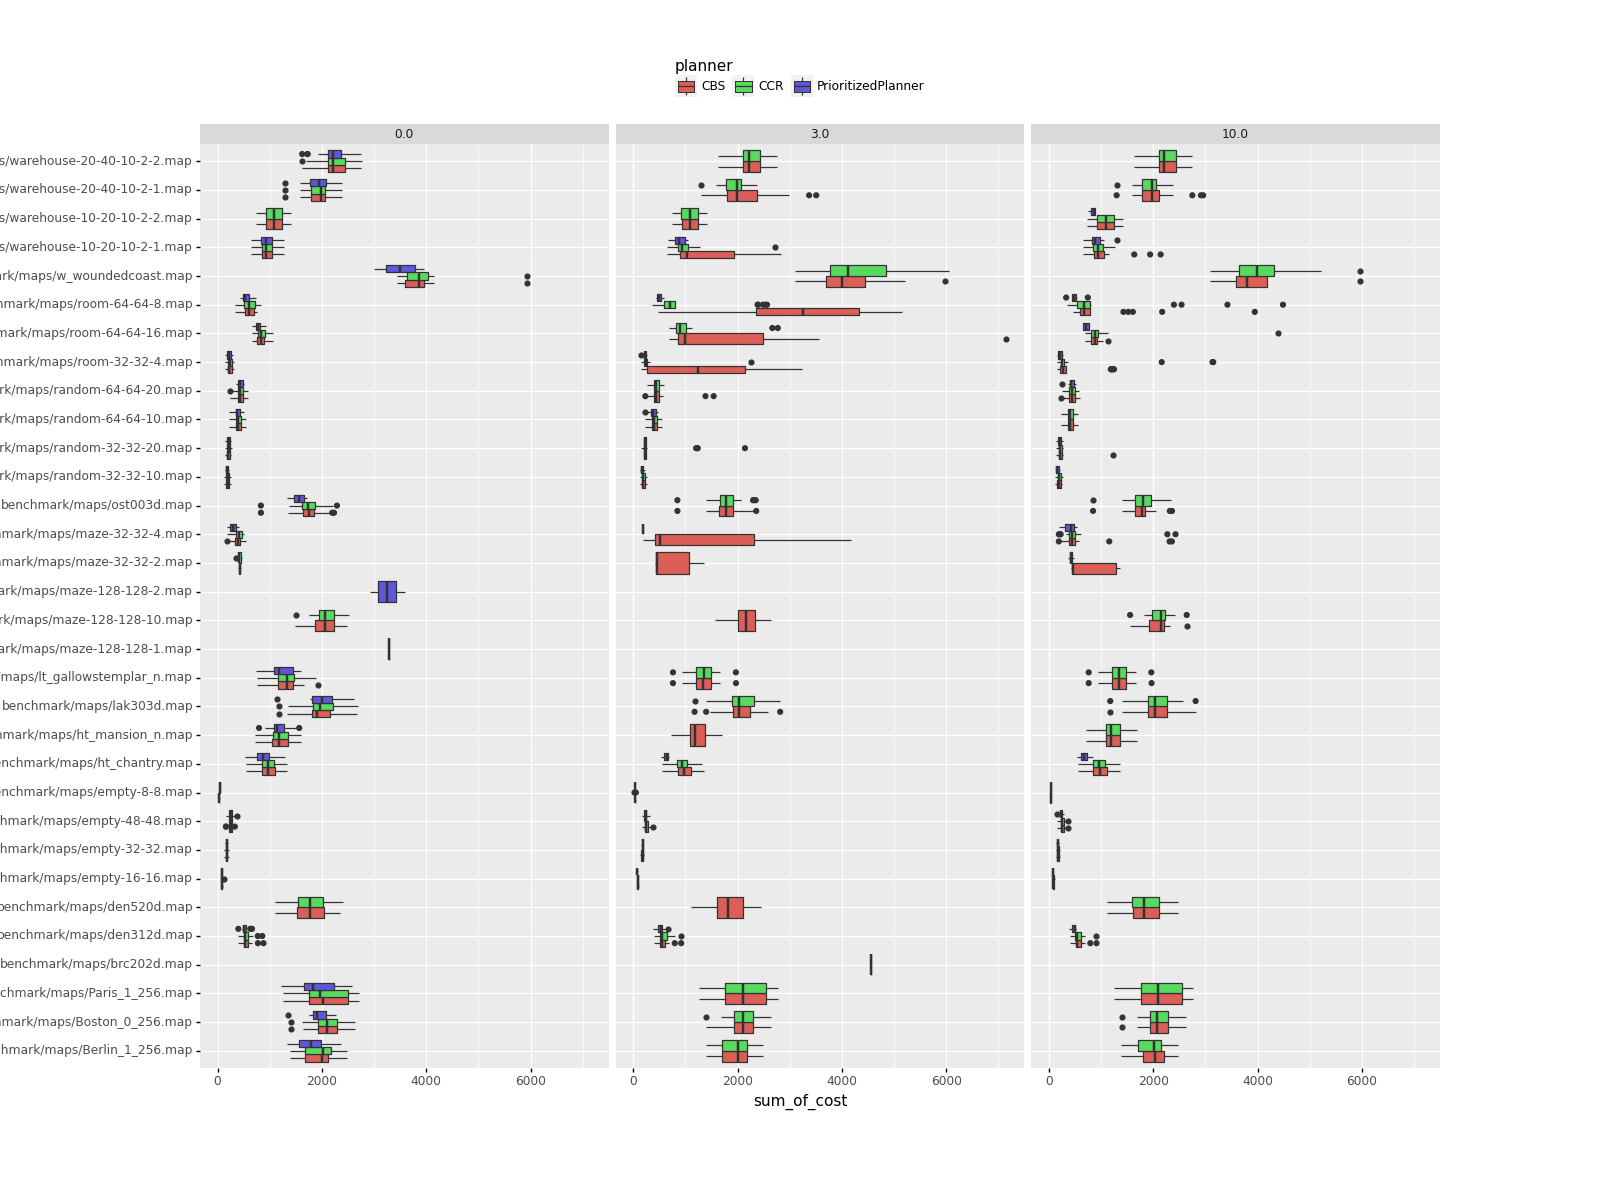

<ggplot: (709234026)>

In [ ]:
ggplot(df.loc[df.k.gt(0) & df.social_reward.eq(0)& df.anti_social_punishment.eq(0)], aes(x="map_file", y="sum_of_cost", fill="planner")) + geom_boxplot(position="dodge") + coord_flip() + facet_wrap(["horizon"]) + theme(figure_size=(16,12), legend_position="top")

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_col : Removed 45 rows containing missing values.


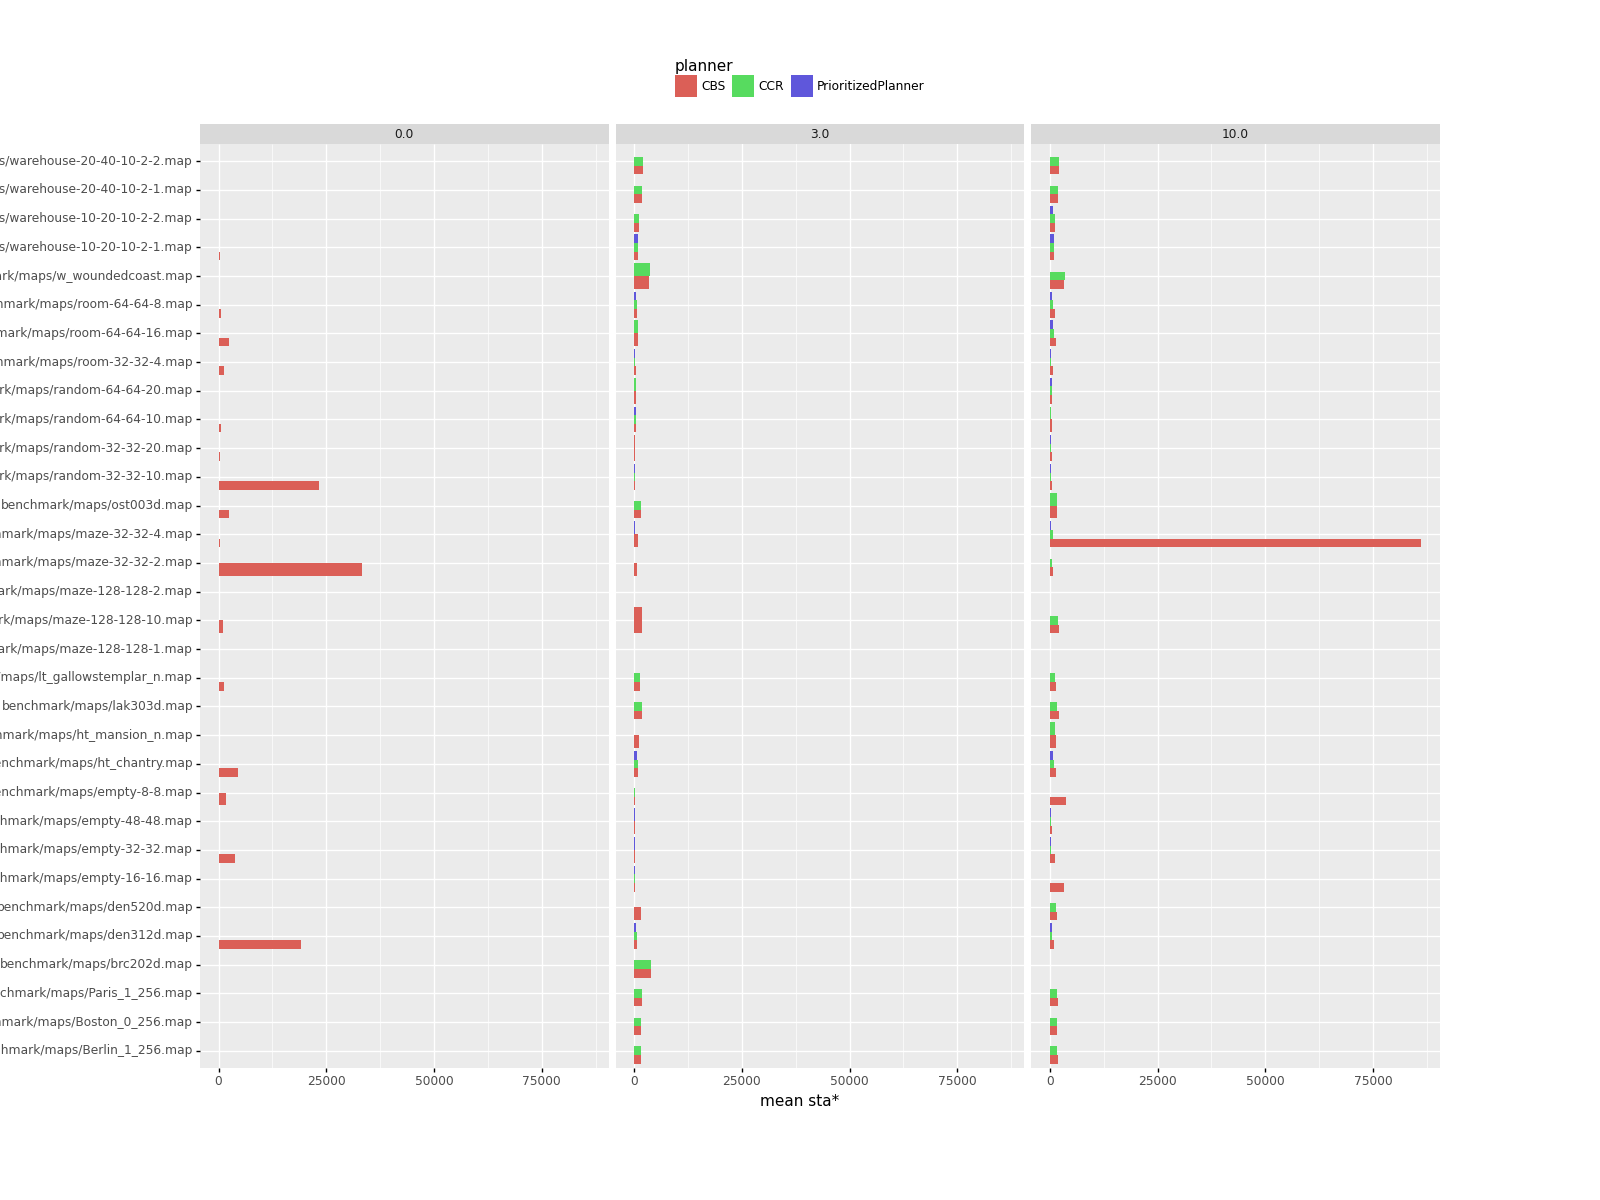

<ggplot: (723156243)>

In [ ]:
ggplot(df_maps.loc[df_maps.social_reward.eq(0)& df_maps.anti_social_punishment.eq(0)], aes(x="map_file", y="mean sta*", fill="planner")) + geom_col(position="dodge")  + coord_flip() + facet_wrap(["horizon"]) + theme(figure_size=(16,12), legend_position="top")

/Users/sebastian/opt/anaconda3/envs/random_progress_model/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


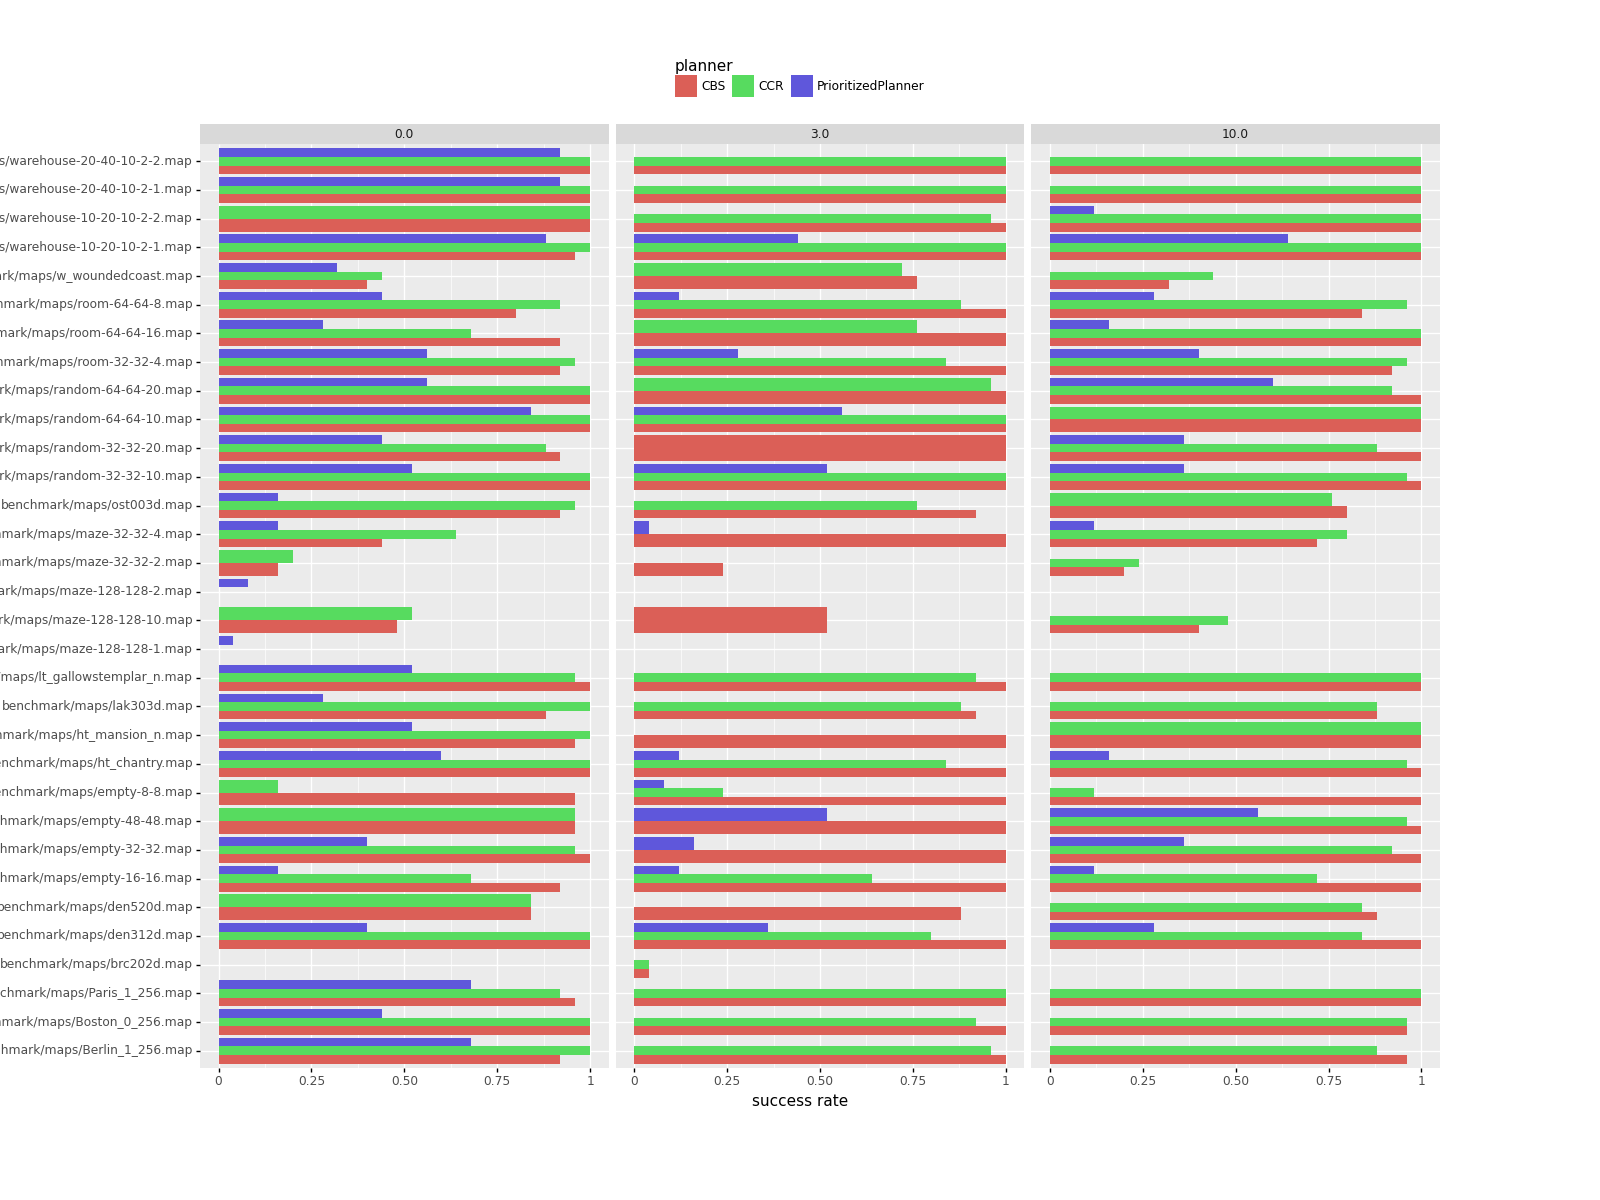

<ggplot: (723300178)>

In [ ]:
ggplot(df_maps.loc[df_maps.social_reward.eq(0)& df_maps.anti_social_punishment.eq(0)], aes(x="map_file", y="success rate", fill="planner")) + geom_col(position="dodge")  + coord_flip() + facet_wrap(["horizon"]) + theme(figure_size=(16,12), legend_position="top")

In [ ]:
df.columns

Index(['scen', 'scentype', 'planner_file', 'k', 'sum_of_cost', 'failed',
       'makespan', 'spatial_astar', 'spacetime_astar', 'map_file', 'planner',
       'limit', 'weight', 'social_reward', 'anti_social_punishment',
       'discard_conflicts_beyond', 'horizon', 'max_iter', '|sta*|'],
      dtype='object')

In [ ]:
d[1]

,scen,scentype,planner_file,k,sum_of_cost,failed,makespan,spatial_astar,spacetime_astar,map_file,planner,limit,weight,social_reward,anti_social_punishment,discard_conflicts_beyond,horizon,max_iter,|sta*|
0,even/maze-128-128-1-even-1.scen,even,CCRaa01s01.yml,-1,-1.000000,False,-1,1,1,benchmark/maps/maze-128-128-1.map,CCR,200,dist,0.1,1.1,NaN,0.0,NaN,-1.000000
1,even/den520d-even-12.scen,even,CCRaa01s01.yml,6,1180.106318,False,240,10,10,benchmark/maps/den520d.map,CCR,200,dist,0.1,1.1,NaN,0.0,NaN,0.041667
2,even/empty-32-32-even-18.scen,even,CCRaa01s01.yml,1,153.396725,False,31,919,20,benchmark/maps/empty-32-32.map,CCR,200,dist,0.1,1.1,NaN,0.0,NaN,0.645161
3,even/warehouse-20-40-10-2-2-even-14.scen,even,CCRaa01s01.yml,3,2662.205688,False,385,10,10,benchmark/maps/warehouse-20-40-10-2-2.map,CCR,200,dist,0.1,1.1,NaN,0.0,NaN,0.025974
4,even/den520d-even-5.scen,even,CCRaa01s01.yml,1,1977.346770,False,300,701,13,benchmark/maps/den520d.map,CCR,200,dist,0.1,1.1,NaN,0.0,NaN,0.043333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,even/Berlin_1_256-even-10.scen,even,CCRaa01.yml,1,2012.471308,False,274,10,10,benchmark/maps/Berlin_1_256.map,CCR,200,dist,0.0,1.1,NaN,0.0,NaN,0.036496
17915,even/maze-128-128-1-even-25.scen,even,CCRaa01.yml,-1,-1.000000,False,-1,1,1,benchmark/maps/maze-128-128-1.map,CCR,200,dist,0.0,1.1,NaN,0.0,NaN,-1.000000
17916,even/warehouse-10-20-10-2-2-even-1.scen,even,CCRaa01.yml,1,1280.090073,False,199,10,10,benchmark/maps/warehouse-10-20-10-2-2.map,CCR,200,dist,0.0,1.1,NaN,0.0,NaN,0.050251
17917,even/empty-8-8-even-18.scen,even,CCRaa01.yml,0,45.970713,False,11,1883,69,benchmark/maps/empty-8-8.map,CCR,200,dist,0.0,1.1,NaN,0.0,NaN,6.272727
